In [2]:
#pip install nsepy

In [123]:
from datetime import date
import numpy as np
import pandas as pd
import nsepy
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
#Reading URL data from csv
#These data are collecting through selenium in different jupyter ntbook
URLS = pd.read_csv("Links.csv")

In [8]:
nifty200sym = pd.read_csv("ind_nifty200list.csv")
nifty200sym.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
2,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017
3,Abbott India Ltd.,Healthcare,ABBOTINDIA,EQ,INE358A01014
4,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024


In [9]:
Index_Price = []
Index_Symbol = "NIFTY 200"
for i in [2022,2021,2020,2019,2018]:
    count = 1
    data = pd.DataFrame()
    try:
        while data.empty == True:
            start = date(i,4,count)
            end = date(i,4,count)
            data = nsepy.get_history(symbol =Index_Symbol, start = start,end = end,index = True)
            if data.empty == False:
                Index_Price.append(data.Close[0])
            count += 1
    except:
        Index_Price.append(0)


In [10]:
Index_Price

[9324.35, 7772.85, 4275.7, 6102.6, 5565.9]

In [11]:
Index_Return = {}
for i in range(0,len(Index_Price)-1):
    Year = 2022
    Index_Return[Year-i]= round((Index_Price[i]-Index_Price[i+1])/Index_Price[i+1],4)


In [12]:
Index_Return

{2022: 0.1996, 2021: 0.8179, 2020: -0.2994, 2019: 0.0964}

In [13]:
Index_Return[2018] = 0

In [14]:
Index_Return

{2022: 0.1996, 2021: 0.8179, 2020: -0.2994, 2019: 0.0964, 2018: 0}

In [67]:
#Finding table from the net and writing into the csv
NotFound = []
for company,URL in zip(URLS["Company Name"],URLS["URL"]):
    try:
        page = requests.get(URL)
        soup = BeautifulSoup(page.text, "lxml")
        table = soup.find('table',{'class':"mctable1"})
        L = []
        for row in table.find_all("tr"):
            data = row.find_all('td')
            row_data = [td.text.strip() for td in data]
            L.append(row_data)
        df = pd.DataFrame(L)
        header = df.loc[0]
        df = df[2:]
        df.columns = header
        df  = df.rename(columns = {list(df)[0] : "Ratio"})
        df.to_csv(company+" Fin Ratio"+".csv")
    except:
        NotFound.append(company)

In [64]:
#Renaming the dataframe columns
No_data = []
for Company in URLS["Company Name"]:
    L=[]
    try:
        company_name = Company+" Fin Ratio.csv"
        df = pd.read_csv(company_name)
    
        for name in list(df):
            if name == "Ratio":
                L.append(name)
            elif name.endswith("22"):
                L.append("2022")
            elif name.endswith("21"):
                L.append("2021")
            elif name.endswith("20"):
                L.append("2020")
            elif name.endswith("19"):
                L.append("2019")
            elif name.endswith("18"):
                L.append("2018")
            else:
                L.append(name)
        df.columns = L
        df.to_csv(company_name)
    except:
        No_data.append(Company)

In [176]:
#Creating the company column and making crt format
for Company in URLS["Company Name"]:
    try:
        Columns = ["Ratio","2022","2021","2020","2019","2018"]
        company_name = Company+" Fin Ratio.csv"
        df = pd.read_csv(company_name)
        #df["Company"] = Company
        df1 =pd.DataFrame()
        for i in list(df):
            if i in Columns:
                df1 = pd.concat([df1,df[i]],axis = 1)
        df1 = df1.transpose()
        df1.columns = df1.iloc[0]
        df1 = df1[1:]
        df1["Company"] = Company
        df1["Year"] = df1.index
        df1.to_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Updated\\"+"Final "+company_name,index = False)
    except:
        continue

In [22]:
#Creating the company column and making crt format
Stock_Performance_data = pd.DataFrame()
for Company,Symbol in zip(nifty200sym["Company Name"],nifty200sym["Symbol"]):
    try:
        Columns = ["Ratio","2022","2021","2020","2019","2018"]
        important_column = ["Year",
                    "Company",
                    "Basic EPS (Rs.)",
                   "Revenue from Operations/Share (Rs.)",
                   "PBDIT Margin (%)",
                   "Return on Networth/Equity (%)",
                   "Total Debt/Equity (X)",
                   "Current Ratio (X)",
                   "Price/BV (X)",
                   "Earnings Yield"]
        company_name = Company+" Fin Ratio.csv"
        df = pd.read_csv(company_name)
        #df["Company"] = Company
        df1 =pd.DataFrame()
        for i in list(df):
            if i in Columns:
                df1 = pd.concat([df1,df[i]],axis = 1)
        df1 = df1.transpose()
        df1.columns = df1.iloc[0]
        df1 = df1[1:]
        df1["Company"] = Company
        df1["Year"] = df1.index
        df1 = df1[important_column]
        for i in list(df1):
            if i != "Company":
                try:
                    df1[i] = pd.to_numeric(df1[i])
                except:
                    df1[i] = df1[i].str.replace(",","")
                    df1[i] = pd.to_numeric(df1[i])
            else:
                continue        
        Change = []
        for i in range(0,len(df1[important_column[3]])-1):
            Change.append(round((df1[important_column[3]][i]-df1[important_column[3]][i+1])/df1[important_column[3]][i+1],4))
        Change.append(0)
        df1["Percentage change in revenue"] = Change
        Stock_Price = []
        for i in df1["Year"]:
            count = 1
            data = pd.DataFrame()
            try:
                while data.empty == True:
                    start = date(i,4,count)
                    end = date(i,4,count)
                    data = nsepy.get_history(symbol = Symbol, start = start,end = end)
                    if data.empty == False:
                        Stock_Price.append(data.VWAP[0])
                    count += 1
            except:
                Stock_Price.append(0)
        df1["Price"] = Stock_Price
        Return = []
        for i in range(0,len(df1[important_column[0]])-1):
            Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
        Return.append(0)
        df1["Return"] = Return
        TypeOfCompany = []
        for i in df1["Year"]:
            if df1.loc[df1["Year"] == i]["Return"][0] > Index_Return[i]:
                TypeOfCompany.append(1)
            elif df1.loc[df1["Year"] == i]["Return"][0] < Index_Return[i]:
                TypeOfCompany.append(0)
            else:
                TypeOfCompany.append("NA")
        df1["Performance"] = TypeOfCompany
        df1["Percentage change in revenue"] = Change
        df1["PE Ratio"] = df1["Price"]/df1["Basic EPS (Rs.)"]
        Stock_Performance_data = pd.concat([Stock_Performance_data,df1],ignore_index=True,axis=0)
        df1.to_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Updated\\"+"Final "+company_name,index = False)
    except :
        print(Company)

ABB India Ltd.
AU Small Finance Bank Ltd.
Abbott India Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Axis Bank Ltd.
Bandhan Bank Ltd.
Bank of Baroda
Bank of India
Canara Bank


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Colgate Palmolive (India) Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  Change.append(round((df1[important_column[3]][i]-df1[important_column[3]][i+1])/df1[important_column[3]][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Federal Bank Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


HDFC Asset Management Company Ltd.
HDFC Bank Ltd.
Honeywell Automation India Ltd.
ICICI Bank Ltd.
ICICI Lombard General Insurance Company Ltd.
IDFC First Bank Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Indian Bank
Indian Railway Catering And Tourism Corporation Ltd.
IndusInd Bank Ltd.
Ipca Laboratories Ltd.
Kotak Mahindra Bank Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in longlong_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in longlong_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Motherson Sumi Wiring India Ltd.
Nestle India Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Page Industries Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in longlong_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


Procter & Gamble Hygiene & Health Care Ltd.
Punjab National Bank
SBI Cards and Payment Services Ltd.
SBI Life Insurance Company Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


State Bank of India
Tata Elxsi Ltd.
Tata Teleservices (Maharashtra) Ltd.
Union Bank of India
Yes Bank Ltd.


C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))
C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\3497030877.py:60: RuntimeWarning: invalid value encountered in double_scalars
  Return.append(round((df1["Price"][i]-df1["Price"][i+1])/df1["Price"][i+1],4))


In [32]:
Stock_Performance_data.to_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Stock_Performance_data.csv",index = False)

In [33]:
Stock_data = pd.read_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Stock_Performance_data.csv")

In [23]:
Stock_Performance_data

Ratio,Year,Company,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Earnings Yield,Percentage change in revenue,Price,Return,Performance,PE Ratio
0,2021,ACC Ltd.,99.21,859.18,19.84,13.01,0.00,1.73,2.91,0.04,0.1716,1905.67,0.9836,1,19.208447
1,2020,ACC Ltd.,76.16,733.34,18.65,11.26,0.00,1.76,2.40,0.05,-0.1195,960.72,-0.4289,0,12.614496
2,2019,ACC Ltd.,73.35,832.89,17.44,11.93,0.00,1.60,2.35,0.05,0.0578,1682.10,0.1006,1,22.932515
3,2018,ACC Ltd.,80.97,787.36,14.80,14.43,0.00,1.42,2.69,0.05,0.0000,1528.38,0.0000,NA,18.875880
4,2022,Adani Enterprises Ltd.,7.06,631.21,6.80,3.59,1.90,0.71,10.26,0.00,0.7558,2033.05,0.8789,1,287.967422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,2022,Zydus Lifesciences Ltd.,43.83,149.07,23.35,26.39,0.25,1.56,2.10,0.13,0.0598,351.69,-0.2056,0,8.023956
793,2021,Zydus Lifesciences Ltd.,20.84,140.66,23.83,16.42,0.35,1.11,3.47,0.05,0.0106,442.73,0.6479,0,21.244242
794,2020,Zydus Lifesciences Ltd.,11.49,139.19,20.32,11.33,0.68,1.05,2.64,0.04,0.0826,268.67,-0.2273,1,23.382942
795,2019,Zydus Lifesciences Ltd.,18.06,128.57,24.18,17.80,0.69,1.16,3.42,0.05,0.1059,347.70,-0.0974,0,19.252492


In [34]:
Stock_data.describe()

,Year,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Earnings Yield,Percentage change in revenue,Price,Return,Performance,PE Ratio
count,797.000000,797.000000,796.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,796.000000,797.000000,780.000000,626.000000,797.000000
mean,2020.022585,-67.123325,1589.148731,26.955232,7.564504,1.109737,7.878934,7.207854,0.018507,inf,1756.275307,inf,0.482428,36.556965
std,1.409584,3255.967135,10800.625236,22.928845,206.304064,4.507842,82.014506,26.722064,0.499117,NaN,5942.932584,NaN,0.500091,108.773578
min,2018.000000,-91449.000000,0.000000,-160.980000,-5530.980000,-50.410000,0.170000,-96.310000,-10.900000,-0.999900,0.000000,-1.000000,0.000000,-253.415254
25%,2019.000000,8.170000,100.480000,15.170000,9.410000,0.010000,1.040000,1.840000,0.020000,0.000000,229.210000,-0.081275,0.000000,10.660473
50%,2020.000000,20.400000,228.580000,22.090000,15.950000,0.220000,1.560000,3.700000,0.030000,0.034350,568.960000,0.000000,0.000000,23.804243
75%,2021.000000,50.820000,505.537500,31.690000,21.340000,0.950000,2.460000,7.060000,0.060000,0.173575,1421.520000,0.428750,1.000000,45.453358
max,2022.000000,3354.200000,202972.970000,96.950000,1083.170000,84.890000,2109.360000,599.540000,1.230000,inf,82794.360000,inf,1.000000,1943.704545


In [35]:
Stock_data.groupby(Stock_data["Performance"]).count()

,Year,Company,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Earnings Yield,Percentage change in revenue,Price,Return,PE Ratio
Performance,,,,,,,,,,,,,,
0.0,324,324,324,323,324,324,324,324,324,324,324,324,324,324
1.0,302,302,302,302,302,302,302,302,302,302,302,302,302,302


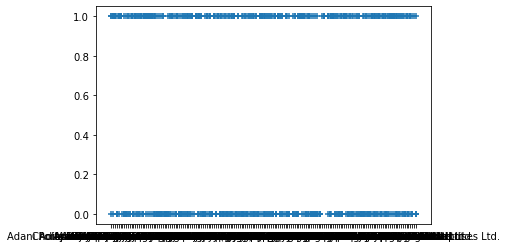

In [122]:
plt.scatter(Stock_data.Company,Stock_data.Performance,marker = "+")

## Predictor and Target

In [255]:
Performance_Data = Stock_data.dropna()

In [256]:
Performance_Data.isnull().sum()

Year                                   0
Company                                0
Basic EPS (Rs.)                        0
Revenue from Operations/Share (Rs.)    0
PBDIT Margin (%)                       0
Return on Networth/Equity (%)          0
Total Debt/Equity (X)                  0
Current Ratio (X)                      0
Price/BV (X)                           0
Earnings Yield                         0
Percentage change in revenue           0
Price                                  0
Return                                 0
Performance                            0
PE Ratio                               0
dtype: int64

In [259]:
Performance_Data

,Year,Company,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Earnings Yield,Percentage change in revenue,Price,Return,Performance,PE Ratio
0,2021,ACC Ltd.,99.21,859.18,19.84,13.01,0.00,1.73,2.91,0.04,0.1716,1905.67,0.9836,1.0,19.208447
1,2020,ACC Ltd.,76.16,733.34,18.65,11.26,0.00,1.76,2.40,0.05,-0.1195,960.72,-0.4289,0.0,12.614496
2,2019,ACC Ltd.,73.35,832.89,17.44,11.93,0.00,1.60,2.35,0.05,0.0578,1682.10,0.1006,1.0,22.932515
4,2022,Adani Enterprises Ltd.,7.06,631.21,6.80,3.59,1.90,0.71,10.26,0.00,0.7558,2033.05,0.8789,1.0,287.967422
5,2021,Adani Enterprises Ltd.,8.39,359.49,8.24,5.37,0.89,0.93,6.61,0.01,-0.0891,1082.05,7.0235,1.0,128.969011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2022,Zomato Ltd.,-1.67,5.49,-32.34,-7.32,0.00,10.60,3.81,-0.02,-0.9999,84.35,NaN,1.0,-50.508982
792,2022,Zydus Lifesciences Ltd.,43.83,149.07,23.35,26.39,0.25,1.56,2.10,0.13,0.0598,351.69,-0.2056,0.0,8.023956
793,2021,Zydus Lifesciences Ltd.,20.84,140.66,23.83,16.42,0.35,1.11,3.47,0.05,0.0106,442.73,0.6479,0.0,21.244242
794,2020,Zydus Lifesciences Ltd.,11.49,139.19,20.32,11.33,0.68,1.05,2.64,0.04,0.0826,268.67,-0.2273,1.0,23.382942


In [258]:
Performance_Data.replace([np.inf,-np.inf],np.nan,inplace = True)

C:\Users\Balaji\AppData\Local\Temp\ipykernel_9972\1479671269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Performance_Data.replace([np.inf,-np.inf],np.nan,inplace = True)


In [260]:
Performance_Data.isin([np.inf,-np.inf]).sum()

Year                                   0
Company                                0
Basic EPS (Rs.)                        0
Revenue from Operations/Share (Rs.)    0
PBDIT Margin (%)                       0
Return on Networth/Equity (%)          0
Total Debt/Equity (X)                  0
Current Ratio (X)                      0
Price/BV (X)                           0
Earnings Yield                         0
Percentage change in revenue           0
Price                                  0
Return                                 0
Performance                            0
PE Ratio                               0
dtype: int64

In [265]:
Performance_Data.isna().sum()

Year                                   0
Company                                0
Basic EPS (Rs.)                        0
Revenue from Operations/Share (Rs.)    0
PBDIT Margin (%)                       0
Return on Networth/Equity (%)          0
Total Debt/Equity (X)                  0
Current Ratio (X)                      0
Price/BV (X)                           0
Earnings Yield                         0
Percentage change in revenue           0
Price                                  0
Return                                 0
Performance                            0
PE Ratio                               0
dtype: int64

In [264]:
Performance_Data = Performance_Data.dropna()

In [266]:
Performance_Data.shape

(612, 15)

In [268]:
X = Performance_Data.drop(["Performance","Year","Company","Earnings Yield","Price","Return"],axis = 1)
y = Performance_Data.Performance

In [232]:
import math
import numpy as np

In [269]:
X.head()

,Basic EPS (Rs.),Revenue from Operations/Share (Rs.),PBDIT Margin (%),Return on Networth/Equity (%),Total Debt/Equity (X),Current Ratio (X),Price/BV (X),Percentage change in revenue,PE Ratio
0,99.21,859.18,19.84,13.01,0.00,1.73,2.91,0.1716,19.208447
1,76.16,733.34,18.65,11.26,0.00,1.76,2.40,-0.1195,12.614496
2,73.35,832.89,17.44,11.93,0.00,1.60,2.35,0.0578,22.932515
4,7.06,631.21,6.80,3.59,1.90,0.71,10.26,0.7558,287.967422
5,8.39,359.49,8.24,5.37,0.89,0.93,6.61,-0.0891,128.969011


In [270]:
X.isna().sum(axis = 0)

Basic EPS (Rs.)                        0
Revenue from Operations/Share (Rs.)    0
PBDIT Margin (%)                       0
Return on Networth/Equity (%)          0
Total Debt/Equity (X)                  0
Current Ratio (X)                      0
Price/BV (X)                           0
Percentage change in revenue           0
PE Ratio                               0
dtype: int64

In [271]:
y.head()

0    1.0
1    0.0
2    1.0
4    1.0
5    1.0
Name: Performance, dtype: float64

In [272]:
y.shape

(612,)

In [273]:
y.sum()

289.0

In [274]:
y.isna().sum()

0

In [275]:
sum(y==0)

323

In [276]:
# y = y.dropna()

## Train - Validation - Test - Split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [278]:
#Train - Validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                     y_train,
                                                     test_size=0.25)

In [279]:
X_train.shape

(366, 9)

In [280]:
X_valid.shape

(123, 9)

In [281]:
y_valid.shape

(123,)

In [282]:
y_train.shape

(366,)

## Fitting a Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression

In [284]:
model = LogisticRegression()

In [285]:
model.fit(X_train,y_train)

C:\Users\Balaji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [289]:
prediction = model.predict(X_test)

In [290]:
model.score(X_test,y_test)

0.5528455284552846

In [288]:
from sklearn import metrics

In [291]:
cm = metrics.confusion_matrix(y_test, prediction)

In [292]:
print(cm)

[[42 16]
 [39 26]]


In [36]:
# TypeOfCompany = []
# for i in range(0,len(df1["Year"])-1):
#     if df1["Return"][i] > list(Index_Return.values())[i]:
#         TypeOfCompany.append(1)
#     if df1["Return"][i] < list(Index_Return.values())[i]:
#         TypeOfCompany.append(0)
#     else:
#         TypeOfCompany.append("NA")


In [37]:
# TypeOfCompany = []
# for i in df1["Year"]:
#     print(i)
#     if df1.loc[df1["Year"] == i]["Return"][0] > Index_Return[i]:
#         TypeOfCompany.append((i,1))
#     elif df1.loc[df1["Year"] == i]["Return"][0] < Index_Return[i]:
#         TypeOfCompany.append((i,0))
#     else:
#         TypeOfCompany.append((i,"NA"))
        

In [38]:
# TypeOfCompany

In [39]:
# df1["Return"],Index_Return

In [40]:
# df1.loc[df1["Year"] == 2022]["Return"][0]

In [42]:
# TypeOfCompany

In [43]:
# df1.loc[df1["Year"] == 2022]["Return"]

In [44]:
# df1["Year"]

In [45]:
# Index_Return[2022]

In [46]:
# Columns = ["Ratio","2022","2021","2020","2019","2018"]
# Company = "Avenue Supermarts Ltd."
# Symbol = "DMART"
# important_column = ["Year",
#             "Company",
#             "Basic EPS (Rs.)",
#            "Revenue from Operations/Share (Rs.)",
#            "PBDIT Margin (%)",
#            "Return on Networth/Equity (%)",
#            "Total Debt/Equity (X)",
#            "Current Ratio (X)",
#            "Price/BV (X)",
#            "Earnings Yield"]
# company_name = Company+" Fin Ratio.csv"
# df = pd.read_csv(company_name)
# #df["Company"] = Company
# df1 =pd.DataFrame()
# for i in list(df):
#     if i in Columns:
#         df1 = pd.concat([df1,df[i]],axis = 1)
# df1 = df1.transpose()
# df1.columns = df1.iloc[0]
# df1 = df1[1:]
# df1["Company"] = Company
# df1["Year"] = df1.index
# df1 = df1[important_column]
# for i in list(df1):
#     if i != "Company":
#         try:
#             df1[i] = pd.to_numeric(df1[i])
#         except:
#             df1[i] = df1[i].str.replace(",","")
#             df1[i] = pd.to_numeric(df1[i])
#     else:
#         continue        
# Change = []
# for i in range(0,len(df1[important_column[3]])-1):
#     Change.append(round((df1[important_column[3]][i]-df1[important_column[3]][i+1])/df1[important_column[3]][i+1],4))
# Change.append(0)
# df1["Percentage change in revenue"] = Change
# Stock_Price = []
# for i in [2022,2021,2020,2019,2018]:
#     count = 1
#     data = pd.DataFrame()
#     while data.empty == True:
#         start = date(i,4,count)
#         end = date(i,4,count)
#         data = nsepy.get_history(symbol = Symbol, start = start,end = end)
#         if data.empty == False:
#             Stock_Price.append(data.VWAP[0])
#         count += 1
# df1["Price"] = Stock_Price
# df1.to_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Updated\\"+"Final "+company_name,index = False)

In [47]:
# Stock_Price = []
# Symbol = "ADANIGREEN"
# for i in df1["Year"]:
#     count = 1
#     data = pd.DataFrame()
#     try:
#         while data.empty == True:
#             start = date(i,4,count)
#             end = date(i,4,count)
#             data = nsepy.get_history(symbol = Symbol, start = start,end = end)
#             if data.empty == False:
#                 Stock_Price.append(data.Close[0])
#             count += 1
#     except:
#         Stock_Price.append(0)

In [48]:
# list(Index_Return.values())[0]

In [49]:
# Stock_Price = []
# Symbol = "ADANIGREEN"
# for i in df1["Year"]:
#     count = 1
#     data = pd.DataFrame()
#     try:
#         while data.empty == True:
#             start = date(i,4,count)
#             end = date(i,4,count)
#             data = nsepy.get_history(symbol = Symbol, start = start,end = end)
#             if data.empty == False:
#                 Stock_Price.append(data.VWAP[0])
#             count += 1
#     except:
#         Stock_Price.append(0)

In [50]:
# Stock_Price

In [51]:

# Company = "Avenue Supermarts Ltd."
# Symbol = "NIFTY 200"
# for i in [2022,2021,2020,2019]:
#     count = 1
#     data = pd.DataFrame([0])
#     while True:
#         start = date(i,4,count)
#         end = date(i,4,count)
#         data = nsepy.get_history(symbol = Symbol, start = start,end = end,index = True)
#         print(i,count,data)
#         count += 1
#         if data.empty == False:
#             Index_Price.append(data.Close[0])
#             break

In [52]:
# data.empty

In [53]:
# Index_Price

In [54]:
# pd.DataFramea([0]).empty

In [55]:
# Index_Price

In [56]:
# data.Close

In [57]:
# count

In [58]:
# start = date(2018,4,2)
# end = date(2018,4,4)
# data = nsepy.get_history(symbol = "NIFTY 200", start = start,end = end, index = True)

In [60]:
# data

In [61]:
# data.empty

In [62]:
# data.Close[0]

In [63]:
# Stock_Price

In [64]:
# data = nsepy.get_history(symbol = "SBI", start = date(1,4,2021),end = date(4,4,2021)

In [65]:
# df1.convert_dtypes()

In [66]:
# df1.astype("str")

In [67]:
# df1["Year"] = pd.to_numeric(df1["Year"])

In [68]:
# df1.dtypes

In [70]:
#  for i in df1["Company"]:
#     print(type(i))

In [71]:
# df1["Revenue from Operations/Share (Rs.)"].str.replace(",","")

In [72]:
# for i in list(df1):
#     if i != "Company":
#         try:
#             df1[i] = pd.to_numeric(df1[i])
#         except:
#             df1[i] = df1[i].str.replace(",","")
#             df1[i] = pd.to_numeric(df1[i])
#     else:
#         continue

In [73]:
# df1.dtypes

In [74]:
# df1.loc[:,df1.columns != "Company"] = pd.to_numeric(df1.loc[:,df1.columns != "Company"])

In [75]:
# df1.dtypes

In [76]:
# list(df1)

In [77]:
# Columns = ["Ratio","2022","2021","2020","2019","2018"]
# company_name = "Adani Green Energy Ltd."+" Fin Ratio.csv"
# df = pd.read_csv(company_name)
# df1 =pd.DataFrame()
# for i in list(df):
#     if i in Columns:
#         df1 = pd.concat([df1,df[i]],axis = 1)
# df1 = df1.transpose()
# df1.columns = df1.iloc[0]
# df1 = df1[1:]
# df1["Year"] = df1.index
# df1

In [78]:
# df1 = pd.read_csv("C:\\Users\\Balaji\\Praxis Projects\\Placements\\Nifty 200\\Updated\\"+"Final Adani Transmission Ltd. Fin Ratio.csv")

In [79]:
# df1

In [80]:
# df1["Stock_Price"] =  Stock_Price

In [81]:
# list(df1)

In [82]:
# df1

In [83]:
# df1.transpose().to_csv("SamplePakka.csv",index= False)

In [84]:
# columns = df1[]
# df2 = df1.transpose()
# Columns_transformed = df2.iloc[0]
# df3 = df1.transpose()
# df3.columns = Columns_transformed
# df3[1:]

In [85]:
# df1.transpose()[0:]

In [86]:
# important_column = ["Year",
#                     "Company",
#                     "Basic EPS (Rs.)",
#                    "Revenue from Operations/Share (Rs.)",
#                    "PBDIT Margin (%)",
#                    "Return on Networth/Equity (%)",
#                    "Total Debt/Equity (X)",
#                    "Current Ratio (X)",
#                    "Price/BV (X)",
#                    "Earnings Yield"]

In [87]:
# important_column[]

In [88]:
# df1.dtypes

In [89]:
# df1[important_column[3]]

In [90]:
# Change = []
# for i in range(0,len(df1[important_column[3]])-1):
#     print(type(df1[important_column[3]][i]))
#     Change.append(round((df1[important_column[3]][i]-df1[important_column[3]][i+1])/df1[important_column[3]][i+1],4))
# Change.append(0)

In [91]:
# Change

In [92]:
# df1["Percentage change in revenue"] = Change

In [93]:
# df1

In [94]:
# round((1/df1["Earnings Yield"]),4)

In [95]:
# df1[df1.columns != "Company"]

In [96]:
# df1.columns != "Company"

In [81]:
# for i in list(df1):
#     print(df1[i])

In [85]:
# pd.DataFrame(NotFound).to_csv("NoData.csv")

In [86]:
# df = pd.read_csv("Torrent Power Ltd. Fin Ratio.csv")

In [87]:
# df.to_csv("Torrent Power Ltd. Fin Ratio.csv")

In [88]:
# list(df)

In [79]:
# L = []
# for name in list(df):
#     if name == "Ratio":
#         L.append(name)
#     elif name.endswith("22"):
#         L.append("2022")
#     elif name.endswith("21"):
#         L.append("2021")
#     elif name.endswith("20"):
#         L.append("2020")
#     elif name.endswith("19"):
#         L.append("2019")
#     elif name.endswith("18"):
#         L.append("2018")
#     else:
#         L.append(name)

In [89]:
# df.iloc[:,2:(6+3)]

In [33]:
# df.columns = L

In [39]:
# df.to_csv("Torrent Power Ltd. Fin Ratio.csv")

In [97]:
# L

In [99]:
# symbol = "SBIN"
# Stock_Price = []
# for i in [2022,2021,2020,2019,2018]:
#     count = 1
#     data = pd.DataFrame()
#     while data.empty == True:
#         start = date(i,4,count)
#         end = date(i,4,count)
#         data = nsepy.get_history(symbol = symbol, start = start,end = end)
#         if data.empty == False:
#             Stock_Price.append(data.VWAP[0])
#         count += 1
        


In [100]:
# Stock_Price

In [101]:
# df1

In [102]:
# count = 1
# Stock_Price = []
# data = pd.DataFrame()
# while data.empty == True:
#     start = date(2018,4,count)
#     end = date(2018,4,count)
#     data = nsepy.get_history(symbol = symbol, start = start,end = end)
#     if data.empty == False:
#         Stock_Price.append(data.VWAP[0])
#     count += 1

In [103]:
# data.VWAP.values

In [104]:
# Stock_Price

In [105]:
# data = pd.DataFrame()

In [106]:
# data

In [107]:
# data.empty

In [108]:
# Stock_Price

In [109]:
# start = date(2019,3,31)
# end = date(2019,3,31)
# data = nsepy.get_history(symbol = symbol, start = start,end = end)

In [110]:
# data

In [111]:
# data.empty

In [113]:
# data.to_csv("SampleReturn.csv")

In [114]:
# import numpy as np

In [115]:
# Average_Price = np.mean([data["Open"],data["Close"],data["High"],data["Low"]],axis = 0)

In [116]:
# data["Average_Price"] = Average_Price

In [117]:
# data["Average_Price"]

In [118]:
# for i in range(1,len(data["Average_Price"])):
#     print((data["Average_Price"][i],data["Average_Price"][i-1],round((data["Average_Price"][i]-data["Average_Price"][i-1])/data["Average_Price"][i-1],4)))

In [119]:
# Return_list = [0]
# for i in range(1,len(data["Average_Price"])):
#     Return_list.append(round((data["Average_Price"][i]-data["Average_Price"][i-1])/data["Average_Price"][i-1],4))
# Return_list

In [37]:
# #Dowloading contents of the web page
# url = "https://www.moneycontrol.com/financials/siemens/consolidated-ratiosVI/S#S"
# page = requests.get(url)

In [39]:
# soup = BeautifulSoup(page.text, "lxml")

In [79]:
# soup

In [41]:
# #getting the table

# table = soup.find('table',{'class':"mctable1"})

In [78]:
# table

In [45]:
# headers = []
# for i in table.find_all("th"):
#     title = i.text.strip()
#     headers.append(title)

In [80]:
# df = pd.DataFrame()

In [77]:
# L = []
# for row in table.find_all("tr")[2:]:
#     data = row.find_all('td')
#     row_data = [td.text.strip() for td in data]
#     L.append(row_data)

In [76]:
# pd.DataFrame(L).rename(columns = {0:"Ratios",
#                                   1 :"2022" ,
#                                    2:"2021",
#                                   3:"2020",
#                                   4:"2019",
#                                   5:"2018"})

In [74]:
# for i,j in zip(URLS["Company Name"],URLS["URL"]):
#     print(i,j)

In [61]:
# # for company,URL in zip(URLS["Company Name"],URLS["URL"]):
# url = "https://www.moneycontrol.com/financials/siemens/consolidated-ratiosVI/S#S"
# page = requests.get(url)
# soup = BeautifulSoup(page.text, "lxml")
# table = soup.find('table',{'class':"mctable1"})
# L = []
# for row in table.find_all("tr"):
#     data = row.find_all('td')
#     row_data = [td.text.strip() for td in data]
#     L.append(row_data)
# df = pd.DataFrame(L)
# header = df.loc[0]
# df = df[2:]
# df.columns = header
# df  = df.rename(columns = {list(df)[0]: "Ratio"})
# # #     df.to_csv()

In [72]:
# header = df.loc[0]
# df = df[2:]
# df.columns = header
# df  = df.rename(columns = {"Key Financial Ratios of Siemens (in Rs. Cr.)" : "Ratio"})
# df.columns[2] = "new_name"


In [73]:
# for table in soup.find_all('table'):
#     print(table.get('class'))

In [27]:
# tables = soup.find_all('table')
# table = soup.find('table',class_ = "mctable1")

In [36]:
# for row in table.tbody.find_all('tr'):
#     columns = row.find_all('td')
#     row_data = [td.text.str]